In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_excel("Hospitality.xlsx")

In [42]:
df.shape

(50000, 14)

In [43]:
df.head()

,Avg Room Rate,reservation_id,check_in_date,stay_duration,adults,children,room_type,special_requests_flag,booking_channel,reservation_status,advanced_booking,Property,Date,Rate Type
0,71.10,779087-Y5-9824-SA,4/15/2020,13,3,4,Single,Yes,Call Center,Completed,Yes,The Chord,4/15/2020,Weekday
1,71.10,984023-QO-5015-YG,2020-12-06 00:00:00,3,3,3,Single,No,Travel Agent,Completed,Yes,The Chord,2020-12-06 00:00:00,Weekday
2,172.38,518066-UQ-2315-FK,2/25/2020,11,4,2,Queen,No,Call Center,Completed,Yes,The Sankey,2/25/2020,Weekday
3,172.38,130339-H9-2116-KE,9/15/2020,11,4,1,Queen,No,Website,No-Show,Yes,The Sankey,9/15/2020,Weekday
4,199.00,961051-40-0956-EO,2020-05-01 00:00:00,14,2,4,Double,Yes,Walk-in,Completed,No,The Sankey,2020-05-01 00:00:00,Weekend


In [44]:
df["Avg Room Rate"].describe()

count    50000.000000
mean       147.147144
std         48.316584
min         71.100000
25%        103.950000
50%        152.100000
75%        177.450000
max        288.550000
Name: Avg Room Rate, dtype: float64

In [39]:
df.isnull().sum()

Avg Room Rate            0
reservation_id           0
check_in_date            0
stay_duration            0
adults                   0
children                 0
room_type                0
special_requests_flag    0
booking_channel          0
reservation_status       0
advanced_booking         0
Property                 0
Date                     0
Rate Type                0
dtype: int64

# Room Type Analysis

In [7]:
df["room_type"].value_counts()

Double             12936
Single             10764
Queen               8872
Suite               6623
King                6565
Executive Suite     4240
Name: room_type, dtype: int64

Text(0.5, 1.0, 'Room type based Reservation')

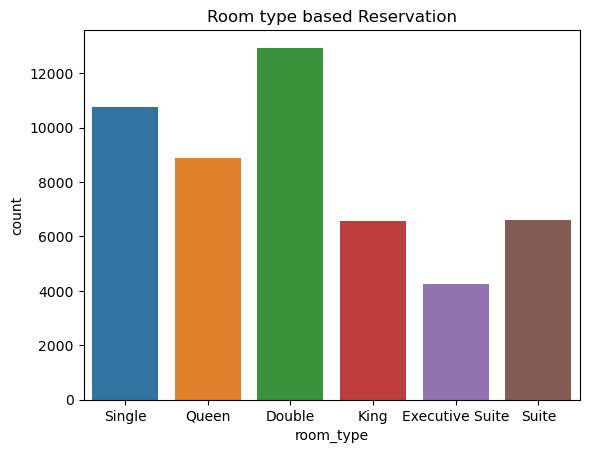

In [8]:
sns.countplot(x="room_type",y=None,data=df)
plt.title("Room type based Reservation")

# Booking Channel Insights

In [9]:
df["booking_channel"].value_counts()

Phone App       15391
Travel Agent    11574
Website         11532
Call Center      7700
Walk-in          3803
Name: booking_channel, dtype: int64

In [10]:
booking_status=df[df["reservation_status"]=="Completed"].groupby("booking_channel").size().reset_index().rename(columns={0:"Total_reservation"})

In [11]:
print(booking_status)

  booking_channel  Total_reservation
0     Call Center               6920
1       Phone App              13848
2    Travel Agent              10488
3         Walk-in               3400
4         Website              10379


<Axes: xlabel='booking_channel', ylabel='Total_reservation'>

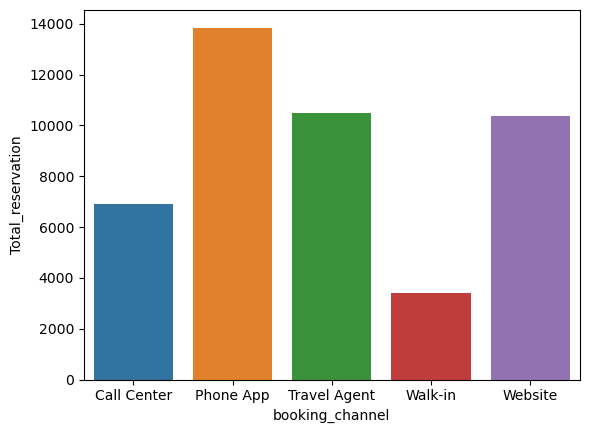

In [12]:
#Based on 'Completed' reservation
sns.barplot(x="booking_channel",y="Total_reservation",data=booking_status)

Observation:The most effective booking channel is Phone App &
            The least effective booking channel is Walk-in 

# Reservation Status Analysis

In [13]:
df["reservation_status"].value_counts()

Completed    45035
No-Show       3550
Extended       953
Reduced        462
Name: reservation_status, dtype: int64

In [14]:
values=df["reservation_status"].value_counts().values
name=df["reservation_status"].value_counts().index

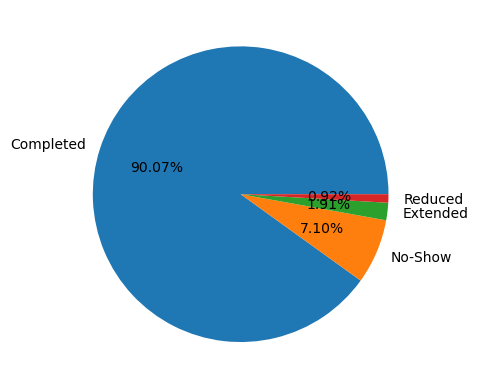

In [45]:
plt.pie(values,labels=name,autopct="%1.2f%%")
plt.show()

# Rate Type Comparison

In [16]:
df[df["Rate Type"]=="Weekday"].groupby("Rate Type")["Avg Room Rate"].mean()

Rate Type
Weekday    142.031001
Name: Avg Room Rate, dtype: float64

In [17]:
df[df["Rate Type"]=="Weekend"].groupby("Rate Type")["Avg Room Rate"].mean()

Rate Type
Weekend    159.810204
Name: Avg Room Rate, dtype: float64

Observation:There is a significant disparity between room rates on weekdays and weekends, with the average room rate being notably higher during weekends compared to weekdays.

# Property Performance

In [18]:
df[["Property","reservation_status"]].groupby(["Property","reservation_status"]).size().reset_index()

,Property,reservation_status,0
0,The Chord,Completed,8039
1,The Chord,Extended,165
2,The Chord,No-Show,646
3,The Chord,Reduced,84
4,The Marimekko,Completed,12298
5,The Marimekko,Extended,246
6,The Marimekko,No-Show,983
7,The Marimekko,Reduced,139
8,The Sankey,Completed,24698
9,The Sankey,Extended,542


In [19]:
prop=df[["Property","reservation_status"]].groupby(["Property","reservation_status"]).size().reset_index()

<Axes: xlabel='Property', ylabel='0'>

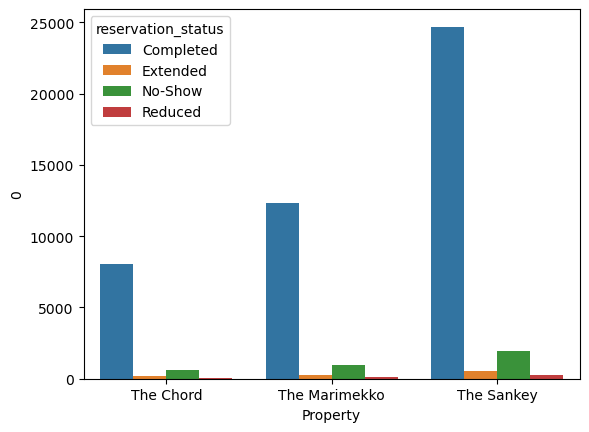

In [20]:
sns.barplot(y=0,x="Property",data=prop,hue="reservation_status")

In [21]:
df[df["Property"]=="The Chord"].groupby("Property")["Avg Room Rate"].mean()

Property
The Chord    88.133999
Name: Avg Room Rate, dtype: float64

In [22]:
df[df["Property"]=="The Marimekko"].groupby("Property")["Avg Room Rate"].mean()

Property
The Marimekko    110.153924
Name: Avg Room Rate, dtype: float64

In [23]:
df[df["Property"]=="The Sankey"].groupby("Property")["Avg Room Rate"].mean()

Property
The Sankey    184.839581
Name: Avg Room Rate, dtype: float64

Observation:The Sankey Property has the highest Avg Room rate

# Advanced Booking Analysis

In [24]:
df[df["advanced_booking"]=="Yes"].groupby("reservation_status").size().reset_index().rename(columns={0:"Total"})

,reservation_status,Total
0,Completed,37945
1,Extended,773
2,No-Show,2985
3,Reduced,371


In [25]:
df1=df[df["advanced_booking"]=="Yes"].groupby("reservation_status").size().reset_index().rename(columns={0:"Total"})

<Axes: xlabel='reservation_status', ylabel='Total'>

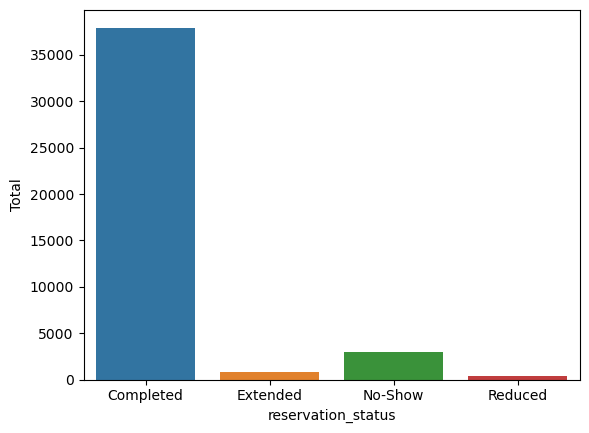

In [26]:
sns.barplot(x="reservation_status",y="Total",data=df1)

In [27]:
df[["advanced_booking","reservation_status"]].groupby(["advanced_booking","reservation_status"]).size().reset_index().rename(columns={0:"Total"})

,advanced_booking,reservation_status,Total
0,No,Completed,7090
1,No,Extended,180
2,No,No-Show,565
3,No,Reduced,91
4,Yes,Completed,37945
5,Yes,Extended,773
6,Yes,No-Show,2985
7,Yes,Reduced,371


In [28]:
df[df["advanced_booking"]=="Yes"].groupby("advanced_booking")["Avg Room Rate"].mean() 

advanced_booking
Yes    147.170475
Name: Avg Room Rate, dtype: float64

In [29]:
df[df["advanced_booking"]=="No"].groupby("advanced_booking")["Avg Room Rate"].mean() 

advanced_booking
No    147.023298
Name: Avg Room Rate, dtype: float64

Observation:There is slight difference in advance booking rate & regular booking rate

# Special Requests Impact

In [30]:
df[df["special_requests_flag"]=="Yes"].groupby("reservation_status").size().reset_index().rename(columns={0:"Total"})

,reservation_status,Total
0,Completed,22424
1,Extended,515
2,No-Show,1768
3,Reduced,233


In [31]:
df[["special_requests_flag","reservation_status"]].groupby(["special_requests_flag","reservation_status"]).size().reset_index().rename(columns={0:"Total"})

,special_requests_flag,reservation_status,Total
0,No,Completed,22611
1,No,Extended,438
2,No,No-Show,1782
3,No,Reduced,229
4,Yes,Completed,22424
5,Yes,Extended,515
6,Yes,No-Show,1768
7,Yes,Reduced,233


In [32]:
df[df["special_requests_flag"]=="Yes"].groupby("special_requests_flag")["Avg Room Rate"].mean()

special_requests_flag
Yes    147.056233
Name: Avg Room Rate, dtype: float64

In [33]:
df[df["special_requests_flag"]=="No"].groupby("special_requests_flag")["Avg Room Rate"].mean()

special_requests_flag
No    147.237621
Name: Avg Room Rate, dtype: float64

Observation:There is no such difference in Avg Room Rate with and without Special Request 